In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Agenda
## cleaning & preparing the data for model training 

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#import csv
df_train= pd.read_csv('train.csv')
df_train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [3]:
df_test=pd.read_csv('test.csv')
df_test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [4]:
#merge both train & test
#append is perform by addding data from bottom 
df=df_train.append(df_test)
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [5]:
#basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
#to see columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  7.836670e+05  783667.000000   783667.000000       783667.000000   
mean   1.003029e+06       8.079300        0.409777            5.366196   
std    1.727267e+03       6.522206        0.491793            3.878160   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001519e+06       2.000000        0.000000            1.000000   
50%    1.003075e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       537685.000000       237858.000000  550068.000000  
mean             9.844506           12.668605    9263.968713  
std              5.089093            4.125510    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [8]:
#delete unuseful column from data
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
df.head()

Product_ID Gender   Age  Occupation City_Category  \
0  P00069042      F  0-17          10             A   
1  P00248942      F  0-17          10             A   
2  P00087842      F  0-17          10             A   
3  P00085442      F  0-17          10             A   
4  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [10]:
#for handling gender - converts categorial into numeric
df['Gender']= df['Gender'].map({'F':0 , 'M':1})

In [11]:
df.head()

Product_ID  Gender   Age  Occupation City_Category  \
0  P00069042       0  0-17          10             A   
1  P00248942       0  0-17          10             A   
2  P00087842       0  0-17          10             A   
3  P00085442       0  0-17          10             A   
4  P00285442       1   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [12]:
#for handle category feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
#second way to do it
#pd.get_dummies(df['Age'],drop_first=True)
#but first method is good
df['Age']= df['Age'].map({'0-17':1 , '18-25':2 , '26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
df

Product_ID  Gender  Age  Occupation City_Category  \
0       P00069042       0    1          10             A   
1       P00248942       0    1          10             A   
2       P00087842       0    1          10             A   
3       P00085442       0    1          10             A   
4       P00285442       1    7          16             C   
...           ...     ...  ...         ...           ...   
233594  P00118942       0    3          15             B   
233595  P00254642       0    3          15             B   
233596  P00031842       0    3          15             B   
233597  P00124742       0    5           1             C   
233598  P00316642       0    5           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
233594                         4+               1                   8   
233595                         4+               1                   5   
233596                         4+               1                   1   
233597                         4+               0                  10   
233598                         4+               1                   4   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN    8370.0  
1                      6.0                14.0   15200.0  
2                      NaN                 NaN    1422.0  
3                     14.0                 NaN    1057.0  
4                      NaN                 NaN    7969.0  
...                    ...                 ...       ...  
233594                 NaN                 NaN       NaN  
233595                 8.0                 NaN       NaN  
233596                 5.0                12.0       NaN  
233597                16.0                 NaN       NaN  
233598                 5.0                 NaN       NaN  

[783667 rows x 11 columns]

In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
##fixed categorail city_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

df_city.head()

B  C
0  0  0
1  0  0
2  0  0
3  0  0
4  0  1

In [17]:
#concat both df
df=pd.concat([df,df_city],axis=1)
df.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  B  C  
0                 NaN                 NaN    8370.0  0  0  
1                 6.0                14.0   15200.0  0  0  
2                 NaN                 NaN    1422.0  0  0  
3                14.0                 NaN    1057.0  0  0  
4                 NaN                 NaN    7969.0  0  1

In [44]:
#drop city category
df.drop('City_Category',axis=1,inplace=True)

In [45]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [46]:
#check missing value
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [47]:
#if missing values are here then 
#focus on replacing missing values 
#1st step for seeing how many unique value
df['Product_Category_2'].unique()
#2 nd step for checking mode of it
df['Product_Category_2'].mode()[0]
#2nd step replace with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [48]:
#after handling mssing vlaue check it
df['Product_Category_2'].isnull().sum()

0

In [49]:
#product category 3 replace missing value
#1st step for seeing how many unique value
df['Product_Category_3'].unique()
#2 nd step for checking mode of it
df['Product_Category_3'].mode()[0]
#2nd step replace with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [50]:
#after handling mssing vlaue check it
df['Product_Category_3'].isnull().sum()

0

In [51]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [52]:
df.shape

(783667, 12)

In [53]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [56]:
#replace 4+ to 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10428/2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [58]:
df.head()

Product_ID  Gender  Age  Occupation Stay_In_Current_City_Years  \
0  P00069042       0    1          10                          2   
1  P00248942       0    1          10                          2   
2  P00087842       0    1          10                          2   
3  P00085442       0    1          10                          2   
4  P00285442       1    7          16                          4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [61]:
#convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [63]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


ValueError: cannot reindex from a duplicate axis

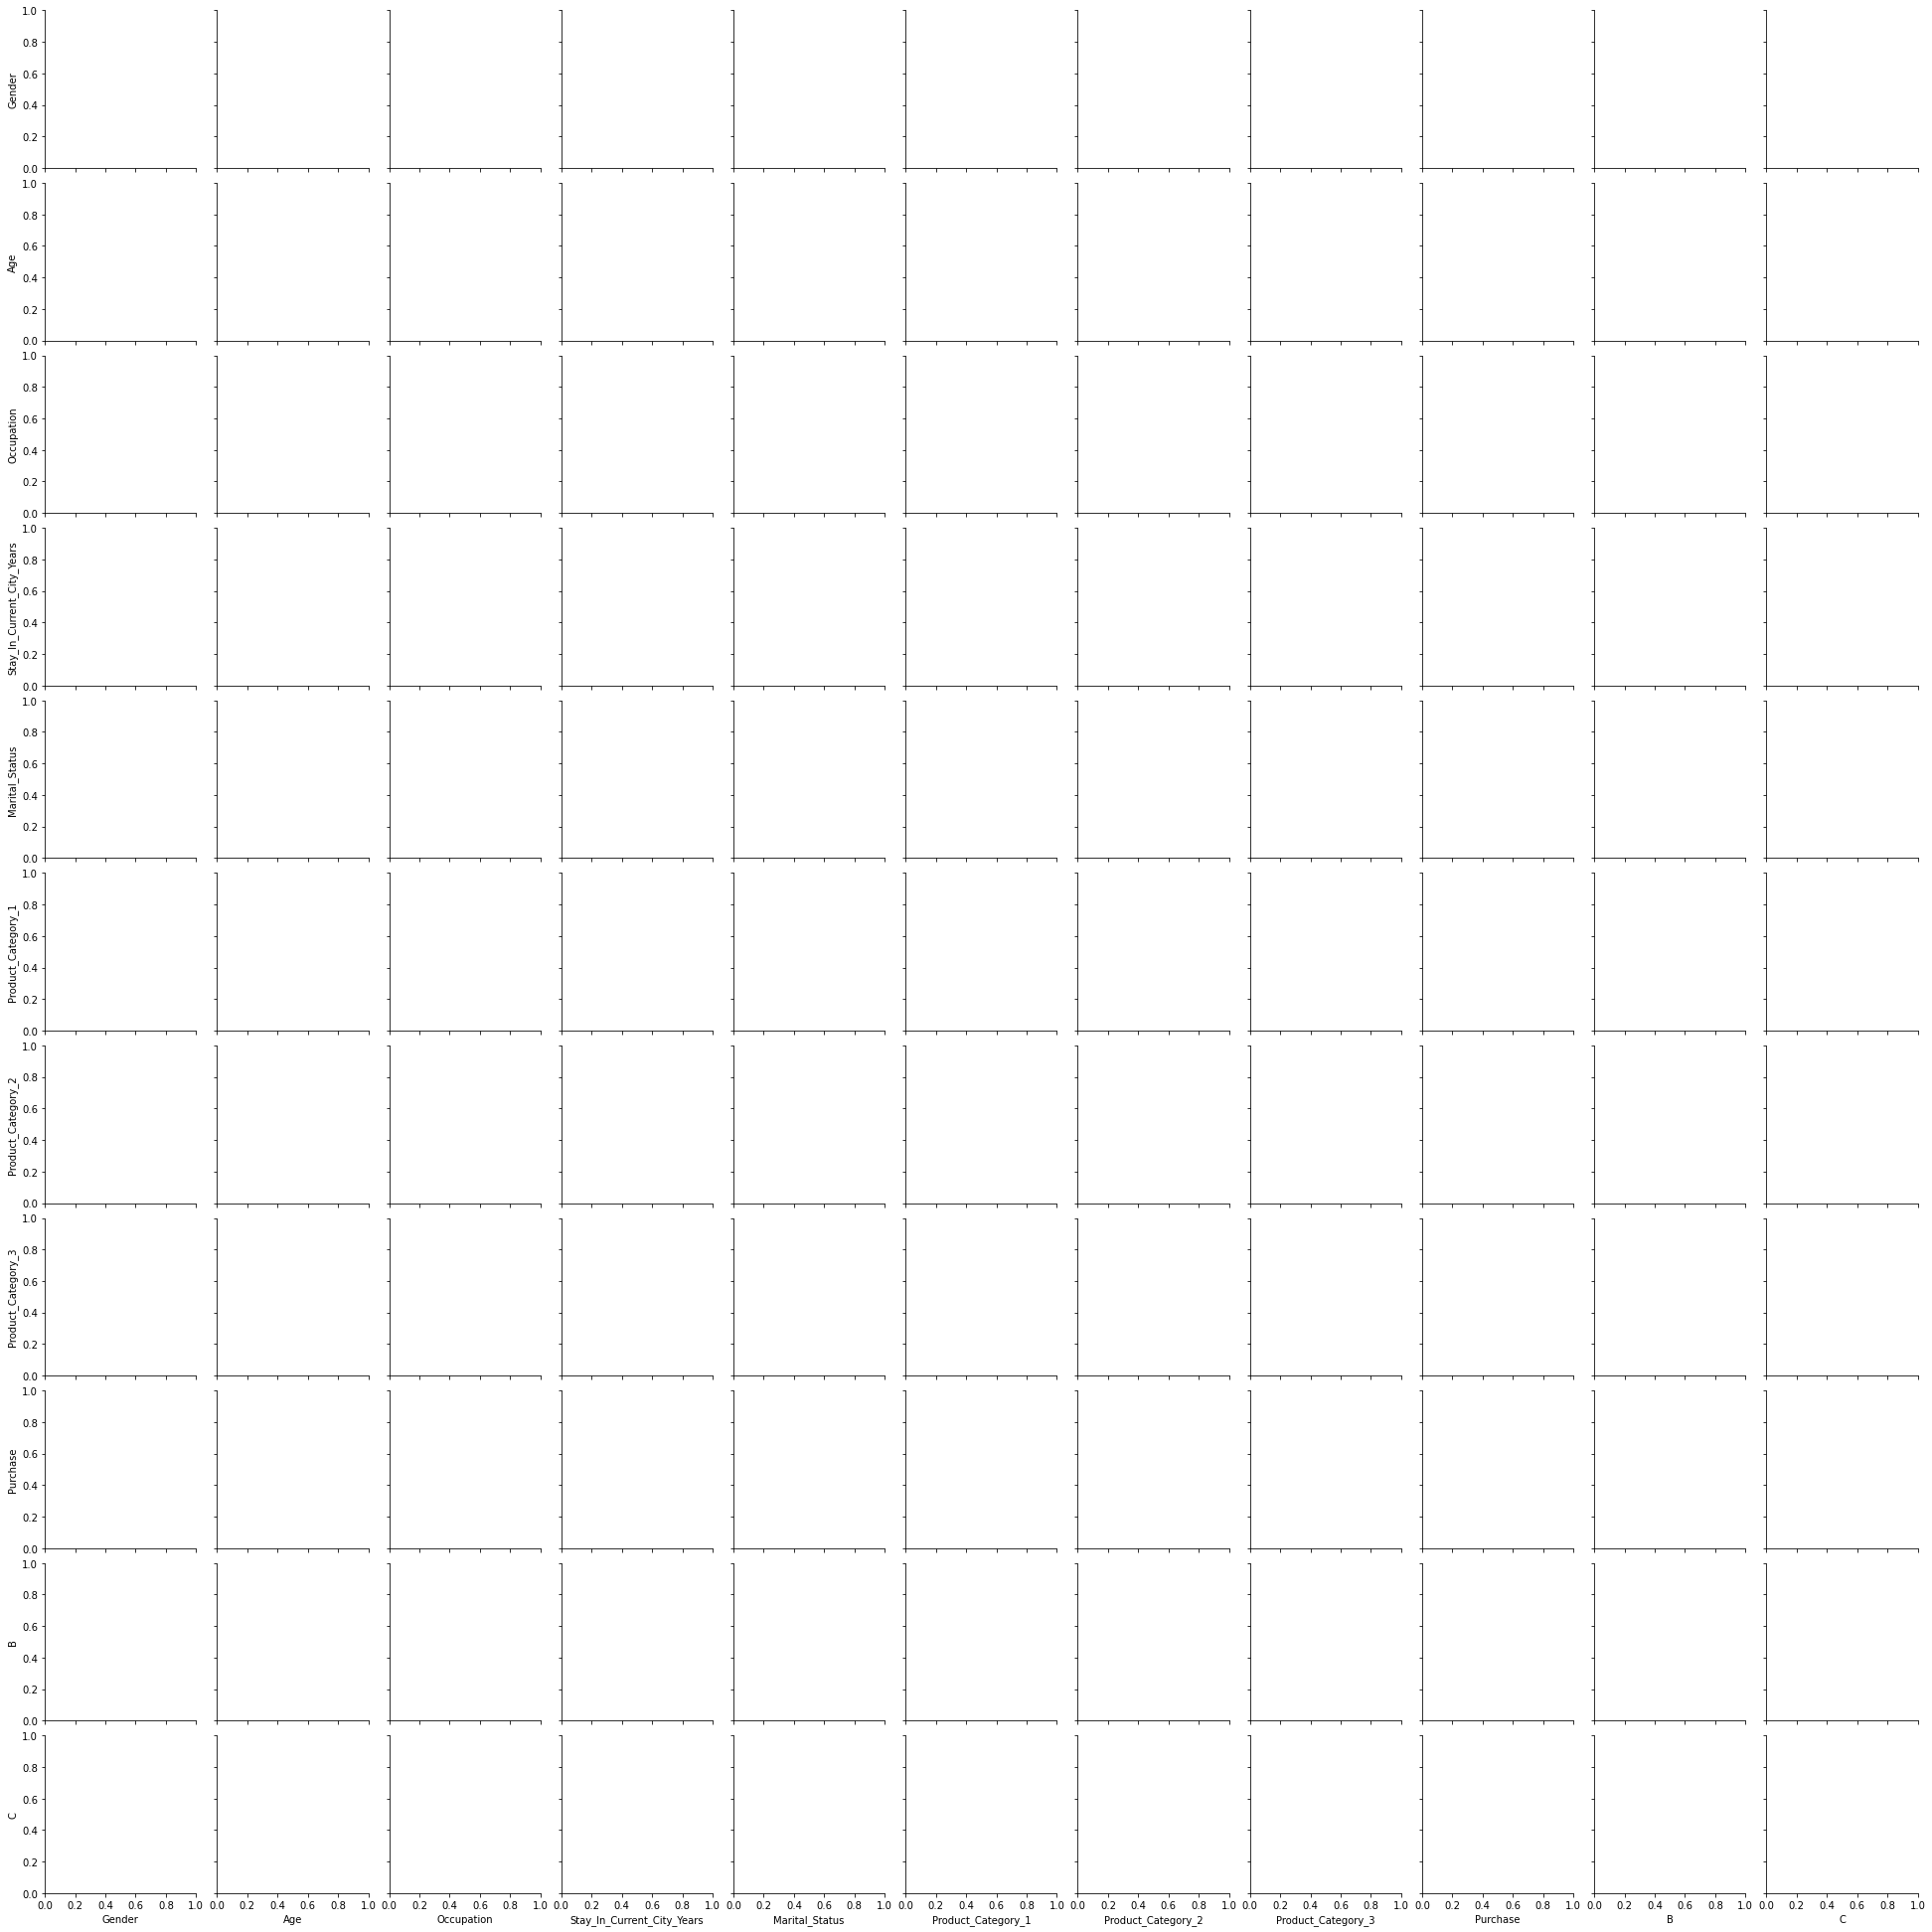

In [64]:
#visualization
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

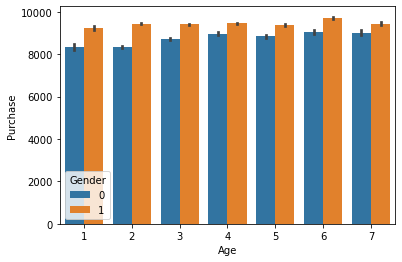

In [66]:
#barplot
sns.barplot('Age','Purchase',hue='Gender',data=df)

## observation
purchasing of men is high then women

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

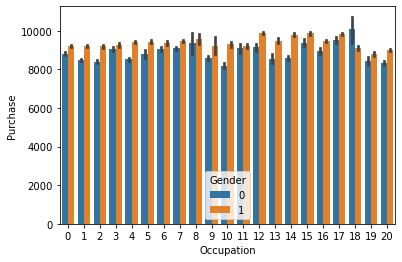

In [67]:
#VISUALIZATION of purchase with occupation

sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

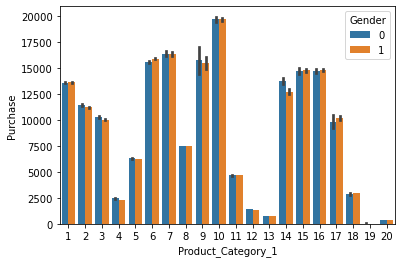

In [68]:

sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

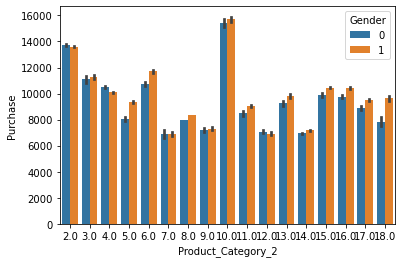

In [69]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

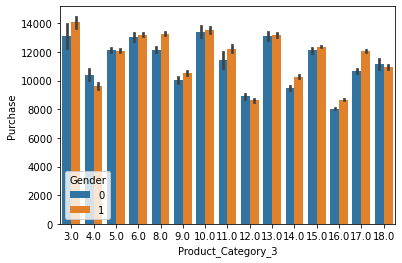

In [70]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [71]:
df.head()

Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0  P00069042       0    1          10                           2   
1  P00248942       0    1          10                           2   
2  P00087842       0    1          10                           2   
3  P00085442       0    1          10                           2   
4  P00285442       1    7          16                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 8.0                16.0   
1               0                   1                 6.0                14.0   
2               0                  12                 8.0                16.0   
3               0                  12                14.0                16.0   
4               0                   8                 8.0                16.0   

   Purchase  B  C  
0    8370.0  0  0  
1   15200.0  0  0  
2    1422.0  0  0  
3    1057.0  0  0  
4    7969.0  0  1

In [74]:
# feature Scaling

df_test= df[df['Purchase'].isnull()]

In [75]:
df_train=df[~df['Purchase'].isnull()]

In [ ]:
from sklearn.preprocessing import StandardScaler
